# Introduction to DEA MODIS Ocean Colour Dataset

**Background:** MODIS Ocean Colour dataset are available for access through Geoscience Australia's Digital Earth Australia (DEA). This document includes a short introduction to the MODIS Ocean Colour Dataset, and briefly describe each of the 16 products available through DEA. The code snippets in this document will retrive Chlorophyll-a and SST products, plot them, and generate and plot time-series of these two products for a location.

**What does this notebook do?** 
This notebook demonstrates how to import MODIS Ocean Colour data using DEA, plot the data, and generate and plot time-series for a location.

**Requirements** 
You need to run the following commands from the command line prior to launching jupyter notebook from the same terminal so that the required libraries and paths are set.

module use /g/data/v10/public/modules/modulefiles

module load dea

If you find an error or bug in this notebook, please either create an 'Issue' in the Github repository, or fix it yourself and create a 'Pull' request to contribute the updated notebook back into the repository (See the repository README for instructions on creating a Pull request).

**Date:** last updated 13th, September, 2019

**Authors:** Zhi Huang, Ayers Damien

# About MODIS

The Moderate Resolution Imaging Spectroradiometer (MODIS) was launched into Earth orbit by NASA in 1999 on board the Terra Satellite, and in 2002 on board the Aqua satellite. The instruments capture data in 36 spectral bands ranging in wavelength from 0.4 µm to 14.4 µm and at varying spatial resolutions (2 bands at 250 m, 5 bands at 500 m and 29 bands at 1 km). Together the instruments image the entire Earth every 1 to 2 days. MODIS data and derived products provide measurements in large-scale global dynamics in the oceans, on land, and in the lower atmosphere. MODIS is playing a vital role in the development of Earth system models able to predict global change accurately enough to assist policy makers in making sound decisions concerning the protection of our environment.

# MODIS Aqua Ocean Color and SST products

## Background

Among the 36 spectral bands, nine bands (Bands 8 to 16) are used to derive Ocean Color products; additional four bands (Band 21, Band 23, Band 31 and Band 32) are used to derive Sea Surface Temperature (SST) products. All of these 13 bands have a spatial resolution of ~ 1 km. 

![Fig 1. MODIS Bands](Files/modis_bands.jpg)

Integrated Marine Observing System (IMOS), a National Research Infrastructure for Australia, supported the assembly of Australasian archives of MODIS raw data and established an Ocean Colour and SST processing system, based on NASA's standard ocean colour processing software SeaDAS, at the National Computational Infrastructure (NCI) (Schroeder et al., 2016). 


## IMOS MODIS Ocean Colour and SST processing workflow

IMOS maintains a national collection of MODIS data at the NCI. The collection begins with Level 0 (raw) data, processed to Level 1b (geolocated, top of atmosphere radiances), and then to a suite of Level 2 Ocean Colour Radiometry (OCR) products that include atmospherically corrected surface reflectance and many derived in?water products, all at full spatial and temporal resolution. The processing of contemporary data uses the most up to date versions of the SeaDAS MODIS calibration tables and the collection is regularly reprocessed to ensure the products are as close to the best?available as is practical. Both MODIS?Aqua and MODIS?Terra archives are maintained up to Level 1b. Only data from MODIS?Aqua, the Ocean Colour Radiometry (OCR) enhanced sensor, is carried through the OCR processing chain to Level 2 and Level 3 (Schroeder et al., 2016). 

A brief description of each processing level for the IMOS MODIS Ocean Colour and SST data is as follows. The Level 0 (raw) data is delivered in near real time from Australian direct broadcast reception stations, augmented by data downloads from NASA. The Level 1b data is computed and calibrated from the Level 0 data using the MODISL1DB package in SeaDAS to obtain georeferenced information and top-of-atmosphere radiances. The Level 2 data is obtained from the Level 1b data using the SeaDAS l2gen module which applies the standard atmospheric corrections to obtain water-leaving radiances. After that, various ocean colour and SST algorithms are applied to derive a range of Ocean Colour and SST products. As a result, the Level 2 Aqua data contain the water-leaving radiances, remote sensing reflectances, and a suite of derived products. At the Level 3 processing, the Level 2 data in satellite projection is re-gridded onto a rectangular longitude-latitude map projection, and merged into daily national mosaic (the Level 3 MODIS Aqua products). 


## IMOS Aqua MODIS Ocean Colour and SST products

In total, 16 IMOS Aqua MODIS Ocean Colour and SST products are accessible through Geoscience Australia's Digital Earth Australia (DEA) platform. These products have the following characteristics:
*	spatial coverage: [10oN,  60oS], [ 80oE, 180oE],
*	spatial resolution: 0.01 decimal degree (~ 1 km),
*	temporal coverage: [2002-07-04, 2018-10-12], and
*	temporal resolution: daily.

Brief descriptions of these 16 products are as follows.

**1.	chl_oc3**

The OC3 chl-a algorithm is an empirical algorithm implemented by the Ocean Biology Processing Group (OBPG) of NASA. The algorithm returns the near-surface concentration of chlorophyll-a in mg/m3, calculated using an empirical relationship derived from in situ measurements of chlorophyll-a and MODIS remote sensing reflectances (O'Reilly et al., 2000). It is a 3-band algorithm using the blue-to-green region of the visible spectrum (440 - 670 nm). A bit more details of the OC3 algorithm is available in https://oceancolor.gsfc.nasa.gov/atbd/chlor_a/.

**2.	chl_gsm**

The Garver-Siegel-Maritorena (GSM) chl-a algorithm (Maritorena et al., 2002) is a semi-analytic algorithm implemented by the OBPG. The GSM model simultaneously retrieves the concentration of chlorophyll-a and the combined absorption and backscattering coefficients of water column constituents.
  
**3.	K_490**

The K_490 variable represents the diffuse attenuation coefficient for downwelling irradiance at 490 nm. The algorithm implemented by the OBPG calculate K_490 in m-1 using an empirical relationship derived from in situ measurements of K_490 and MODIS remote sensing reflectances. It is a 2-band algorithm based on one blue band and one green band. A bit more details of the K_490 algorithm is available in https://oceancolor.gsfc.nasa.gov/atbd/kd_490/.

**4.	Ipar**

The Ipar variable calculates the instantaneous photosynthetically active radiation (iPAR) in Einstein m-2 s-1. The product represents the total PAR incident on the ocean surface at the time of the satellite observation. The algorithm, which is implemented by the OBPG, calculates the sub-surface downwelling irradiance at all MODIS visible bands (Bands 8 to 13) which are then added together and integrated over the entire spectrum. A bit more details of the IPAR algorithm is available in https://oceancolor.gsfc.nasa.gov/atbd/ipar/. 

**5.	par**

The par product represents daily average photosynthetically active radiation (PAR) in Einstein m-2 d-1. PAR is defined as the quantum energy flux from the Sun in the 400-700nm range. The inputs for the PAR algorithm implemented by the OBPG are the observed top-of-Atmosphere radiances in three MODIS bands (Band 1, Band 3 and Band 4). A bit more details of the IPAR algorithm is available in https://oceancolor.gsfc.nasa.gov/atbd/par/. 

**6.	nanop_brewin2010at**

The nanop_brewin2010at product estimates nanoplankton fraction within the ocean surface layer from the chl_oc3 product. The methods used to decompose chl_oc3 are described by Brewin et al (2010) which used calibration data from the Atlantic Oceans. Users should note that this is an unvalidated experimental product and they should familiarise themselves with the underlying algorithms and methodologies described in the published literature before making use of them.

**7.	nanop_brewin2012in**

The nanop_brewin2012in product estimates nanoplankton fraction within the ocean surface layer from the chl_oc3 product. The methods used to decompose chl_oc3 are described by Brewin et al (2012) which used calibration data from the Indian Oceans. Users should note that this is an unvalidated experimental product and they should familiarise themselves with the underlying algorithms and methodologies described in the published literature before making use of them.

**8.	picop_brewin2010at**

The picop_brewin2010at product estimates picoplankton fraction within the ocean surface layer from the chl_oc3 product. The methods used to decompose chl_oc3 are described by Brewin et al (2010) which used calibration data from the Atlantic Oceans. Users should note that this is an unvalidated experimental product and they should familiarise themselves with the underlying algorithms and methodologies described in the published literature before making use of them.

**9.	picop_brewin2012in**

The picop_brewin2012in product estimates picoplankton fraction within the ocean surface layer from the chl_oc3 product. The methods used to decompose chl_oc3 are described by Brewin et al (2012) which used calibration data from the Indian Oceans. Users should note that this is an unvalidated experimental product and they should familiarise themselves with the underlying algorithms and methodologies described in the published literature before making use of them.

**10.	npp_vgpm_eppley_oc3**

The npp_vgpm_eppley_oc3 product estimates the net primary production of ocean waters from the chl_oc3 product. The model used is based on the standard vertically generalised production model (VGPM). The VGPM is a "chlorophyll-based" model that estimates net primary production from chlorophyll using a temperature-dependent description of chlorophyll-specific photosynthetic efficiency. For the VGPM, net primary production is a function of chlorophyll, available light, and the photosynthetic efficiency. The only difference between the Standard VGPM and the Eppley-VGPM is the temperature-dependent description of photosynthetic efficiencies, with the Eppley approach using an exponential function to account for variation in photosynthetic efficiencies due to photoacclimation. A bit more details of the product is available in https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/metadata.show?uuid=27cc65c0-d453-4ba3-a0d6-55e4449fee8c. Note that this is an experimental product.

**11.	npp_vgpm_eppley_gsm**

The npp_vgpm_eppley_oc3 product estimates the net primary production of ocean waters from the chl_gsm product. The model used is based on the standard vertically generalised production model (VGPM). The VGPM is a "chlorophyll-based" model that estimates net primary production from chlorophyll using a temperature-dependent description of chlorophyll-specific photosynthetic efficiency. For the VGPM, net primary production is a function of chlorophyll, available light, and the photosynthetic efficiency. The only difference between the Standard VGPM and the Eppley-VGPM is the temperature-dependent description of photosynthetic efficiencies, with the Eppley approach using an exponential function to account for variation in photosynthetic efficiencies due to photoacclimation. A bit more details of the product is available in https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/metadata.show?uuid=27cc65c0-d453-4ba3-a0d6-55e4449fee8c. 

**12.	owtd**

The owtd product uses the Moore et al. (2009) classification method to classify ocean waters into eight optical water types (OWTs) defined by their optical properties. These eight OWTs range from low-chlorophyll blue-waters (OWT 1 and 2) to turbid, sediment-dominated waters (OWTs 6-8). The SeaDAS OWT implementation is based on the same three MODIS bands used in the OC3 chl-a algorithm. 

**13.	dt**

The dt product indicates the day and the time (as fraction of day) when the data is captured. For example, a pixel value of 19.23 represents the day is 19th, and the time is 5.52 since midnight calculated from 0.23*86400/3600. 

**14.	sst**

This SST algorithm, implemented by the OBPG, returns the skin sea surface temperature in units of °C using the 11µm and 12µm long wave infrared bands (Band 31 and Band 32). The algorithm is based on a modified version of the nonlinear SST algorithm of Walton et. al. (1998). The brightness temperatures of the two bands are first derived from the observed calibrated radiances by inversion (in linear space) of the radiance versus blackbody temperature relationship. The SST is then calculated using the brightness temperatures and the empirical coefficients derived by regression of collocated in situ and satellite observations. A bit more details of the IPAR algorithm is available in https://oceancolor.gsfc.nasa.gov/atbd/sst/. 

**15.	sst_quality**

The sst_quality product indicates the quality level for each SST pixel, with quality levels 0, 1, 2, and 3 correspond to best quality, acceptable quality, low quality and bad quality, respectively. These quality levels are assigned by evaluating test results stored in SST flags and cloud screening. More information is available in https://oceancolor.gsfc.nasa.gov/atbd/sst/.  

**16.	l2_flags**

The l2_flags product indicates which Level 2 flags are turned on. These flags are used to indicate quality of Level 2 Ocean Colour products. Each flag is assigned one of the 32 bits of the l2_flags array (https://oceancolor.gsfc.nasa.gov/atbd/ocl2flags/ ). You can use the "Level-2 Bit-flip Tool" (https://oceancolor.gsfc.nasa.gov/atbd/ocl2flags/) to determine which flags are turned on. For example, a value of 1344 on the l2_flags product indicates that the flags of "coccolith", "straylight" and "coastz" are turned on (i.e., 210 + 28 + 26 = 1344); while a value of 1610612736 indicates that the flags of "prodfail" and "hipol" are turned on (i.e., 230 + 229 = 1610612736). 


## References
Brewin, R.J.W., Sathyendranath, S., Hirata, T., Lavender, S.J., Barciela, R., Hardman-Mountford, N.J (2010). A three-component model of phytoplankton size class for the Atlantic Ocean. Ecological Modelling 221, 1472-1483.

Brewin, R.J.W., Hirata, T., Hardman-Mountford, N.J., Lavender, S.J., Sathyendranath, S., Barlow, R. (2012). The influence of the Indian Ocean Dipole on interannual variations in phytoplankton size structure as revealed by Earth Observation. Deep Sea Research II - SeaWiFS Special Issue 77-80: 117-127.

Maritorena S., Siegel D. A., and Peterson A. R. (2002), Optimization of a semianalytical ocean color model for global?scale applications, Applied Optics, 41(15), 2705?2714.

Moore T. S., Campbell J. W. and Dowell M. D. (2009), A class?based approach to characterizing and mapping the uncertainty of the MODIS ocean chlorophyll product, Remote Sensing of Environment, 113(11), 2424?2430.

O'Reilly J. E., Maritorena S., Siegel D., O'Brien M. O., Toole D., Mitchell B. G., Kahru M., Chavez F. P., Strutton P., Cota G. F., Hooker S. B., McClain C. R., Carder K. L., Muller?Karger F., Harding L., Magnuson A., Phinney D., Moore G. F., Aiken J., Arrigo K. R., Letelier R. M., Culver M. (2000), Ocean Color Chlorophyll a Algorithms for SeaWiFS, OC2, and OC4: Version 4, In SeaWiFS Postlaunch Calibration and Validation Analyses, Volume 11, Part 3, (McClain C. R., Ed.), pages 9?23, Greenbelt, Md.: Goddard Space Flight Center.

Schroeder T., Lovell J., King E., Clementson L., and Scott R., (2016), IMOS Ocean Colour Validation Report 2015?16, Report to the Integrated Marine Observing System (IMOS), CSIRO Oceans and Atmosphere, 33 pp. (http://imos.org.au/fileadmin/user_upload/shared/SRS/ocean_colour/IMOS_OC_Validation_Report_2015-16_Final_Upload.pdf)

Walton, C. C., Pichel, W. G., Sapper, J. F., and May, D. A. (1998). The development and operational application of nonlinear algorithms for the measurement of sea surface temperatures with the NOAA polar-orbiting environmental satellites, Journal of Geophysical Research, 103(C12), 27999-28012.


**Import modules**

In [1]:
from datacube import Datacube
from datacube.storage.masking import mask_invalid_data
%matplotlib inline
import matplotlib.pyplot as plt


**Specify a development database to connect to. It is on a different database server agdcstaging-db.nci.org.au, which means that your ~/.pgpass file will need to specify a password to connect to it as well.**

In [2]:
dc = Datacube(config='/g/data/u46/users/dsg547/modis_oc.conf')

**The only product in this database is the daily ocean colour data between 2002 and 2019.**

In [3]:
dc.list_products()

,name,description,creation_time,lon,format,lat,time,product_type,instrument,platform,label,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,
5,modis_oc_1d,MODIS Ocean Cover Daily,None,None,None,None,None,modis_oc_1d,None,MODIS,None,EPSG:4326,"(-0.01, 0.01)",None,"(latitude, longitude)"


**These are the 16 available products**

In [4]:
dc.list_measurements()

name    dtype  \
product     measurement                                         
modis_oc_1d K_490                              K_490  float32   
            chl_gsm                          chl_gsm  float32   
            chl_oc3                          chl_oc3  float32   
            dt                                    dt  float32   
            ipar                                ipar  float32   
            l2_flags                        l2_flags    int32   
            nanop_brewin2010at    nanop_brewin2010at  float32   
            nanop_brewin2012in    nanop_brewin2012in  float32   
            npp_vgpm_eppley_gsm  npp_vgpm_eppley_gsm  float32   
            npp_vgpm_eppley_oc3  npp_vgpm_eppley_oc3  float32   
            owtd                                owtd     int8   
            par                                  par  float32   
            picop_brewin2010at    picop_brewin2010at  float32   
            picop_brewin2012in    picop_brewin2012in  float32   
            sst                                  sst  float32   
            sst_quality                  sst_quality    int16   

                                                          units  nodata  
product     measurement                                                  
modis_oc_1d K_490                                          m^-1  -999.0  
            chl_gsm                                      mg/m^3  -999.0  
            chl_oc3                                      mg/m^3  -999.0  
            dt                   days since 2016-01-01 00:00:00  -999.0  
            ipar                                  Ein m^-2 s^-1  -999.0  
            l2_flags                                          1    -1.0  
            nanop_brewin2010at                          percent  -999.0  
            nanop_brewin2012in                          percent  -999.0  
            npp_vgpm_eppley_gsm                    mg.m^-3.d^-1  -999.0  
            npp_vgpm_eppley_oc3                    mg.m^-3.d^-1  -999.0  
            owtd                                              1    -1.0  
            par                                 Ein m^-2 day^-1  -999.0  
            picop_brewin2010at                          percent  -999.0  
            picop_brewin2012in                          percent  -999.0  
            sst                                         Celsius  -999.0  
            sst_quality                                       1    -1.0

**Speciefy a query with coordinates and data ranges, resolution and product(s) to be retrived**
- **lat/lon:** Latitude and longitude of the area. e.g. Canberra = `'lat': (-35.25, -35.35), 'lon': (149.05, 149.17)`
- **time:** Date range to fetch the scenes. 
    - You must know the date(s) for which data is available for each product, so that the query can be specified correctly. 
- **resolution:** If the resolution is not the inherited resolution of the products,the retrived data will be resampled.

In [6]:
# define query
query = {'lat': (0, -40),
         'lon': (100, 160),
        'time':('2016-01-01', '2016-01-15'),
        'resolution': (-0.1, 0.1),
        'measurements': ('sst','chl_gsm')}

**Load 15 days of SST (Sea Surface Temperature) and CHL_GSM (Chlorophyll _a_) data from the start of 2016. Note that the resolution has been resampled from 0.01 dd to 0.1 dd to save memory usage.**

In [7]:
data = dc.load(product='modis_oc_1d', **query)

**Mask the nodata (-999) as 'nan'**

In [8]:
data = mask_invalid_data(data)

In [9]:
data

<xarray.Dataset>
Dimensions:    (latitude: 400, longitude: 600, time: 15)
Coordinates:
  * time       (time) datetime64[ns] 2016-01-01T11:59:59.999999 ... 2016-01-15T11:59:59.999999
  * latitude   (latitude) float64 -0.05 -0.15 -0.25 ... -39.75 -39.85 -39.95
  * longitude  (longitude) float64 100.0 100.1 100.2 100.3 ... 159.8 159.8 159.9
Data variables:
    sst        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    chl_gsm    (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    crs:      EPSG:4326

**plot the daily SST and CHL_GSM imageries**

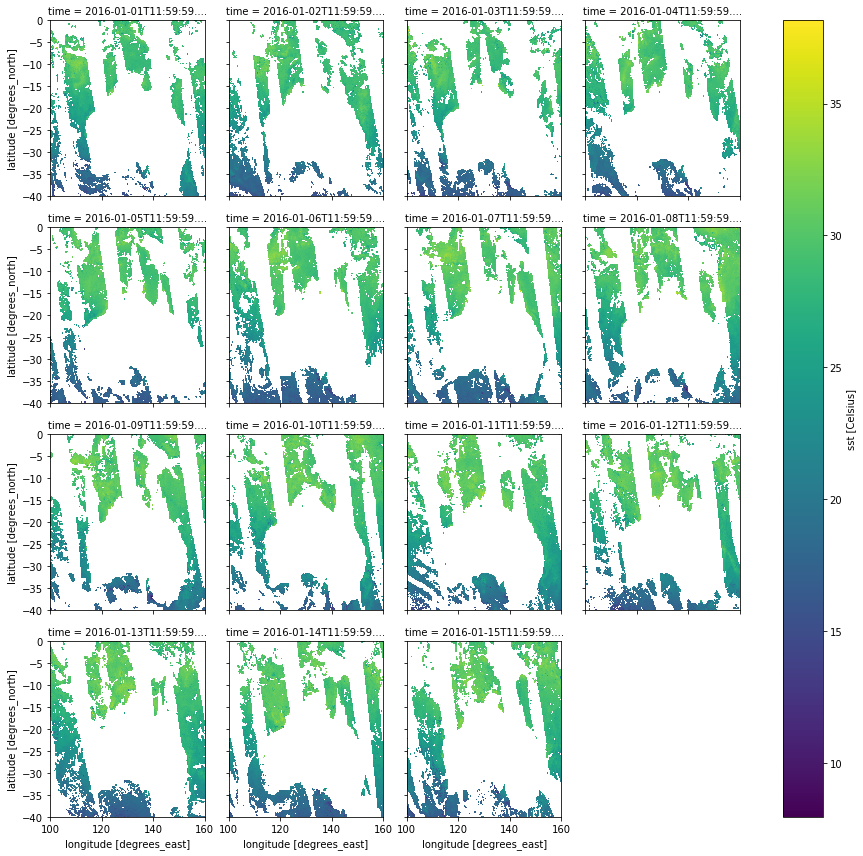

In [10]:
data.sst.plot(col='time',col_wrap=4)

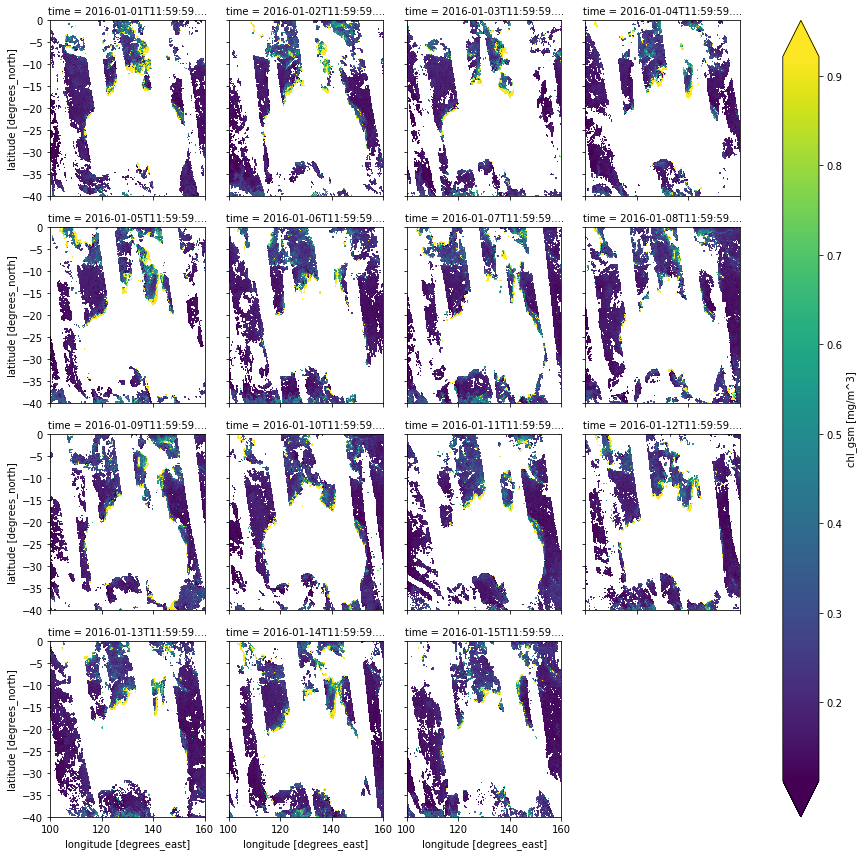

In [11]:
data.chl_gsm.plot(col='time',col_wrap=4,robust=True)

**Try merging the data together every 5 days to fill in the gaps caused by clouds coverage**

In [12]:
data2 = data.resample(time='5D').mean()

/g/data/v10/public/modules/dea-env/20190709/lib/python3.6/site-packages/xarray/core/nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [13]:
data2

<xarray.Dataset>
Dimensions:    (latitude: 400, longitude: 600, time: 3)
Coordinates:
  * time       (time) datetime64[ns] 2016-01-01 2016-01-06 2016-01-11
  * latitude   (latitude) float64 -0.05 -0.15 -0.25 ... -39.75 -39.85 -39.95
  * longitude  (longitude) float64 100.0 100.1 100.2 100.3 ... 159.8 159.8 159.9
Data variables:
    sst        (time, latitude, longitude) float32 nan nan nan ... 17.9925 18.05
    chl_gsm    (time, latitude, longitude) float32 nan nan ... 0.20012486

**Plot the 5-days compsites**

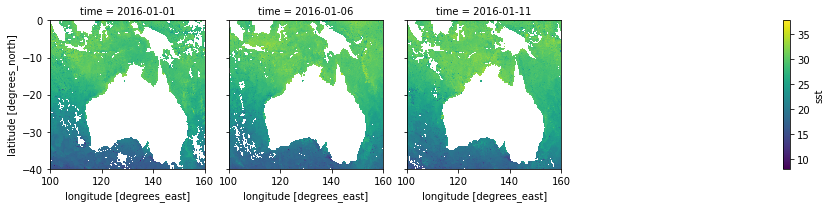

In [14]:
data2.sst.plot(col='time',col_wrap=4)

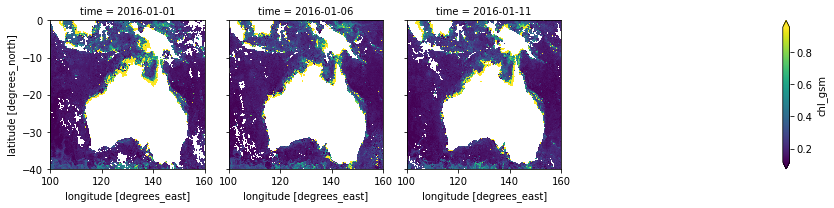

In [15]:
data2.chl_gsm.plot(col='time',col_wrap=4,robust=True)

**Load time series of SST and CHL_GSM for a location off the QLD coast for all available time.**
**It tooks about half a hour to load the data**

In [16]:
time_series = dc.load(product='modis_oc_1d', lat=-20, lon=153, measurements=['sst','chl_gsm'])

In [17]:
time_series = mask_invalid_data(time_series)

In [18]:
time_series

<xarray.Dataset>
Dimensions:    (latitude: 1, longitude: 1, time: 6214)
Coordinates:
  * time       (time) datetime64[ns] 2002-07-04T11:59:59.999999 ... 2019-07-22T11:59:59.999999
  * latitude   (latitude) float64 -20.0
  * longitude  (longitude) float64 153.0
Data variables:
    sst        (time, latitude, longitude) float32 nan nan 24.67 ... nan nan
    chl_gsm    (time, latitude, longitude) float32 nan nan ... nan nan
Attributes:
    crs:      EPSG:4326

**note the full time series is from 2002-07-04 to 2018-10-12**

**Plot the SST time series**

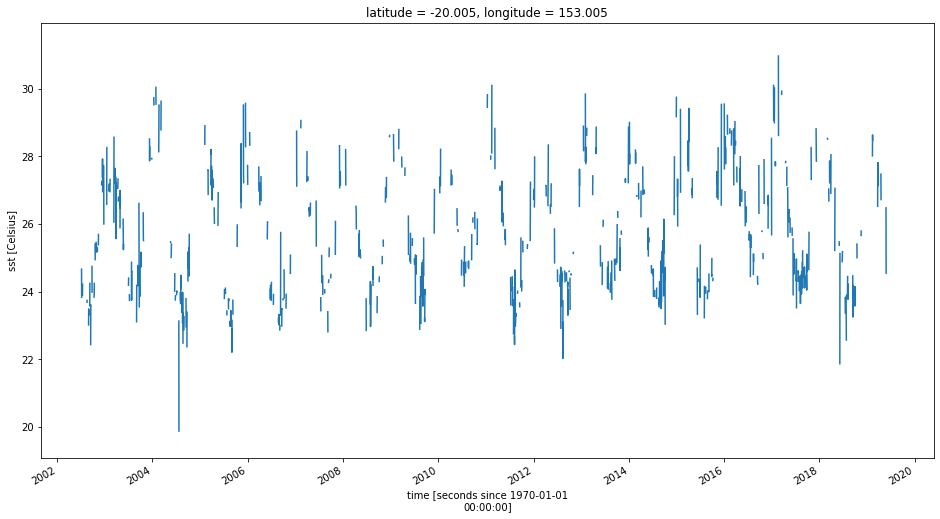

In [19]:
time_series.sst.plot(figsize=(16,8))

**Try out the interpolation features in xarray**

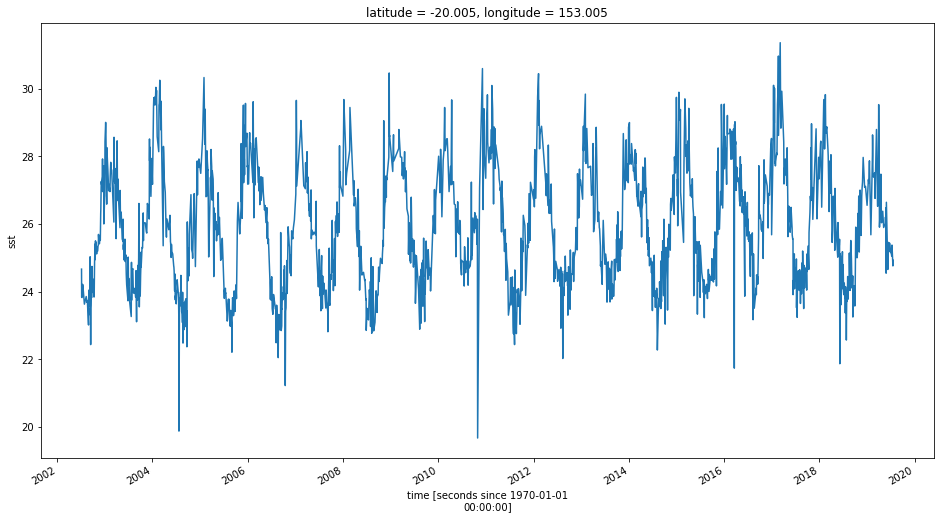

In [21]:
time_series.interpolate_na(dim='time').sst.plot(figsize=(16,8))

**Plot the CHL_GSM time series**

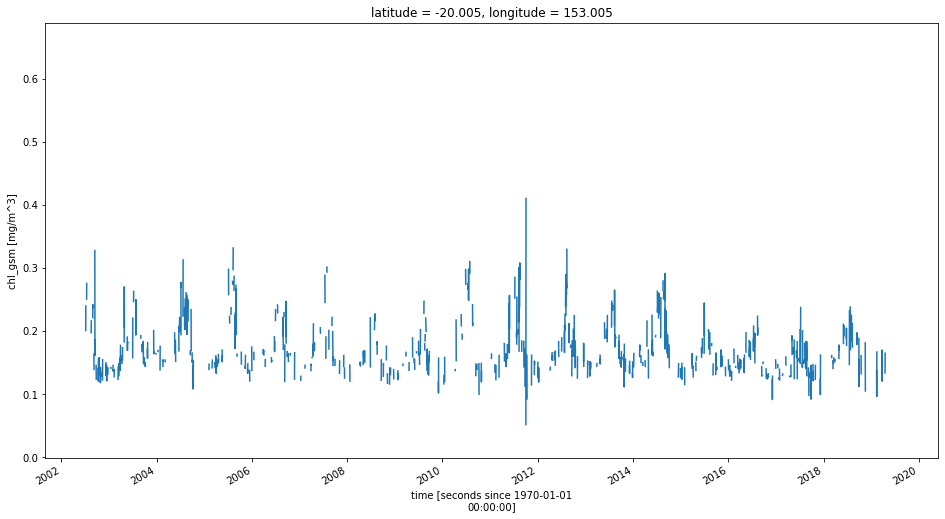

In [22]:
time_series.chl_gsm.plot(figsize=(16,8))

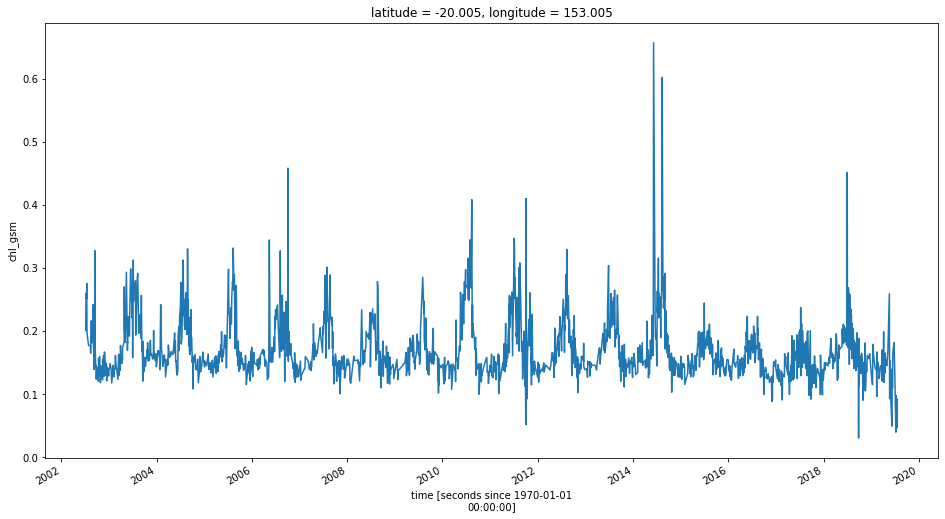

In [23]:
time_series.interpolate_na(dim='time').chl_gsm.plot(figsize=(16,8))